1. Tentukan Library yang digunakan

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('gaya_belajar.csv')
df.head()

,NO,Nama,Hobi,Pelajaran_Suka,Metode_belajar,Rekomendasi
0,1,Syifa,Baca Buku,ENGLISH,Menghafal,Auditori
1,2,Syafiq,Baca Buku,B.Inggris,Menghafal,Visual
2,3,Daffa,Baca Buku,Matematika,Membaca,Visual
3,4,Alif,Badminton,PJOK,Menulis,Kinestetik
4,5,Hana,Badminton,Seni Budaya,Menulis,Kinestetik


In [8]:
df = df.drop(['NO', 'Nama '], axis=1)
df.head()

,Hobi,Pelajaran_Suka,Metode_belajar,Rekomendasi
0,Baca Buku,ENGLISH,Menghafal,Auditori
1,Baca Buku,B.Inggris,Menghafal,Visual
2,Baca Buku,Matematika,Membaca,Visual
3,Badminton,PJOK,Menulis,Kinestetik
4,Badminton,Seni Budaya,Menulis,Kinestetik


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
import pickle
le_hobi = LabelEncoder()
le_pelajaran = LabelEncoder()
le_metode = LabelEncoder()

df["Hobi"] = le_hobi.fit_transform(df["Hobi"])
df["Pelajaran_Suka"] = le_pelajaran.fit_transform(df["Pelajaran_Suka"])
df["Metode_belajar"] = le_metode.fit_transform(df["Metode_belajar"])

# Simpan LabelEncoder
with open("encoders.pkl", "wb") as f:
    pickle.dump({
        "hobi": le_hobi,
        "pelajaran": le_pelajaran,
        "metode": le_metode
    }, f)


In [11]:
enc = LabelEncoder()

In [14]:
df['Hobi'] = enc.fit_transform(df['Hobi'].values)
df['Pelajaran_Suka'] = enc.fit_transform(df['Pelajaran_Suka'].values)
df['Metode_belajar'] = enc.fit_transform(df['Metode_belajar'].values)
df['Rekomendasi'] = enc.fit_transform(df['Rekomendasi'].values)
df.head()

,Hobi,Pelajaran_Suka,Metode_belajar,Rekomendasi
0,0,4,1,0
1,0,0,1,2
2,0,8,0,2
3,1,13,2,1
4,1,17,2,1


In [13]:
df.head()

,Hobi,Pelajaran_Suka,Metode_belajar,Rekomendasi
0,0,4,1,0
1,0,0,1,2
2,0,8,0,2
3,1,13,2,1
4,1,17,2,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hobi            127 non-null    int64
 1   Pelajaran_Suka  127 non-null    int64
 2   Metode_belajar  127 non-null    int64
 3   Rekomendasi     127 non-null    int64
dtypes: int64(4)
memory usage: 4.1 KB


In [38]:
numerical = []
catgols = []

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numerical.append(col)
    else:
        catgols.append(col)


for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
       df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/rc/72ywqc3n7rn4cdhs24s977vw0000gn/T/ipykernel_76604/3363540555.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/rc/72ywqc3n7rn4cdhs24s977vw0000gn/T/ipykernel_76604/3363540555.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [39]:
numerical

['Hobi', 'Pelajaran_Suka', 'Metode_belajar', 'Rekomendasi']

In [40]:
catgols

[]

In [41]:
df['Rekomendasi'].value_counts()

Rekomendasi
1    63
2    42
0    22
Name: count, dtype: int64

In [42]:
ind_col = [col for col in df.columns if col not in ['Rekomendasi']]
dep_col = 'Rekomendasi'

In [43]:
df[dep_col].value_counts()

Rekomendasi
1    63
2    42
0    22
Name: count, dtype: int64

Transformasi dataset

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[dep_col] = le.fit_transform(df[col])


In [18]:
df['Rekomendasi'] = le.fit_transform(df['Rekomendasi'])

In [19]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [20]:
df.head()

,Hobi,Pelajaran_Suka,Metode_belajar,Rekomendasi
0,0,4,1,0
1,0,0,1,2
2,0,8,0,2
3,1,13,2,1
4,1,17,2,1


In [26]:
df.to_csv('gaya_belajar_encoded.csv')

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## membuat model desicion tree

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.8217821782178217
akurasi data testing = 0.8076923076923077 

confusion matrix : 
[[ 2  0  1]
 [ 0 15  2]
 [ 1  1  4]]

classification report : 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.94      0.88      0.91        17
           2       0.57      0.67      0.62         6

    accuracy                           0.81        26
   macro avg       0.73      0.74      0.73        26
weighted avg       0.82      0.81      0.81        26



## Simulasi Model

In [29]:
# Simulasi Model
expected_features = x_train.shape[1]
print(f"Model expects {expected_features} features.")
# Contoh input, ganti sesuai urutan dan jumlah fitur pada x_train
input_data = tuple([0]*expected_features)  # Ganti nilai sesuai kebutuhan
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(f"Input shape: {input_data_reshaped.shape}")
if input_data_reshaped.shape[1] != expected_features:
    raise ValueError(f"Input data must have {expected_features} features, got {input_data_reshaped.shape[1]}")
prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('Metode belajar Siswa Auditori')
elif prediction[0] == 1:
    print('Metode belajar Siswa Visual')
else:
    print('Metode belajar Siswa Kinestetik')

Model expects 3 features.
Input shape: (1, 3)
[2]
Metode belajar Siswa Kinestetik


/Users/macos/Documents/07. TUGAS AKHIR/3. SKRIPSI/web-desicion-tree/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Pohon

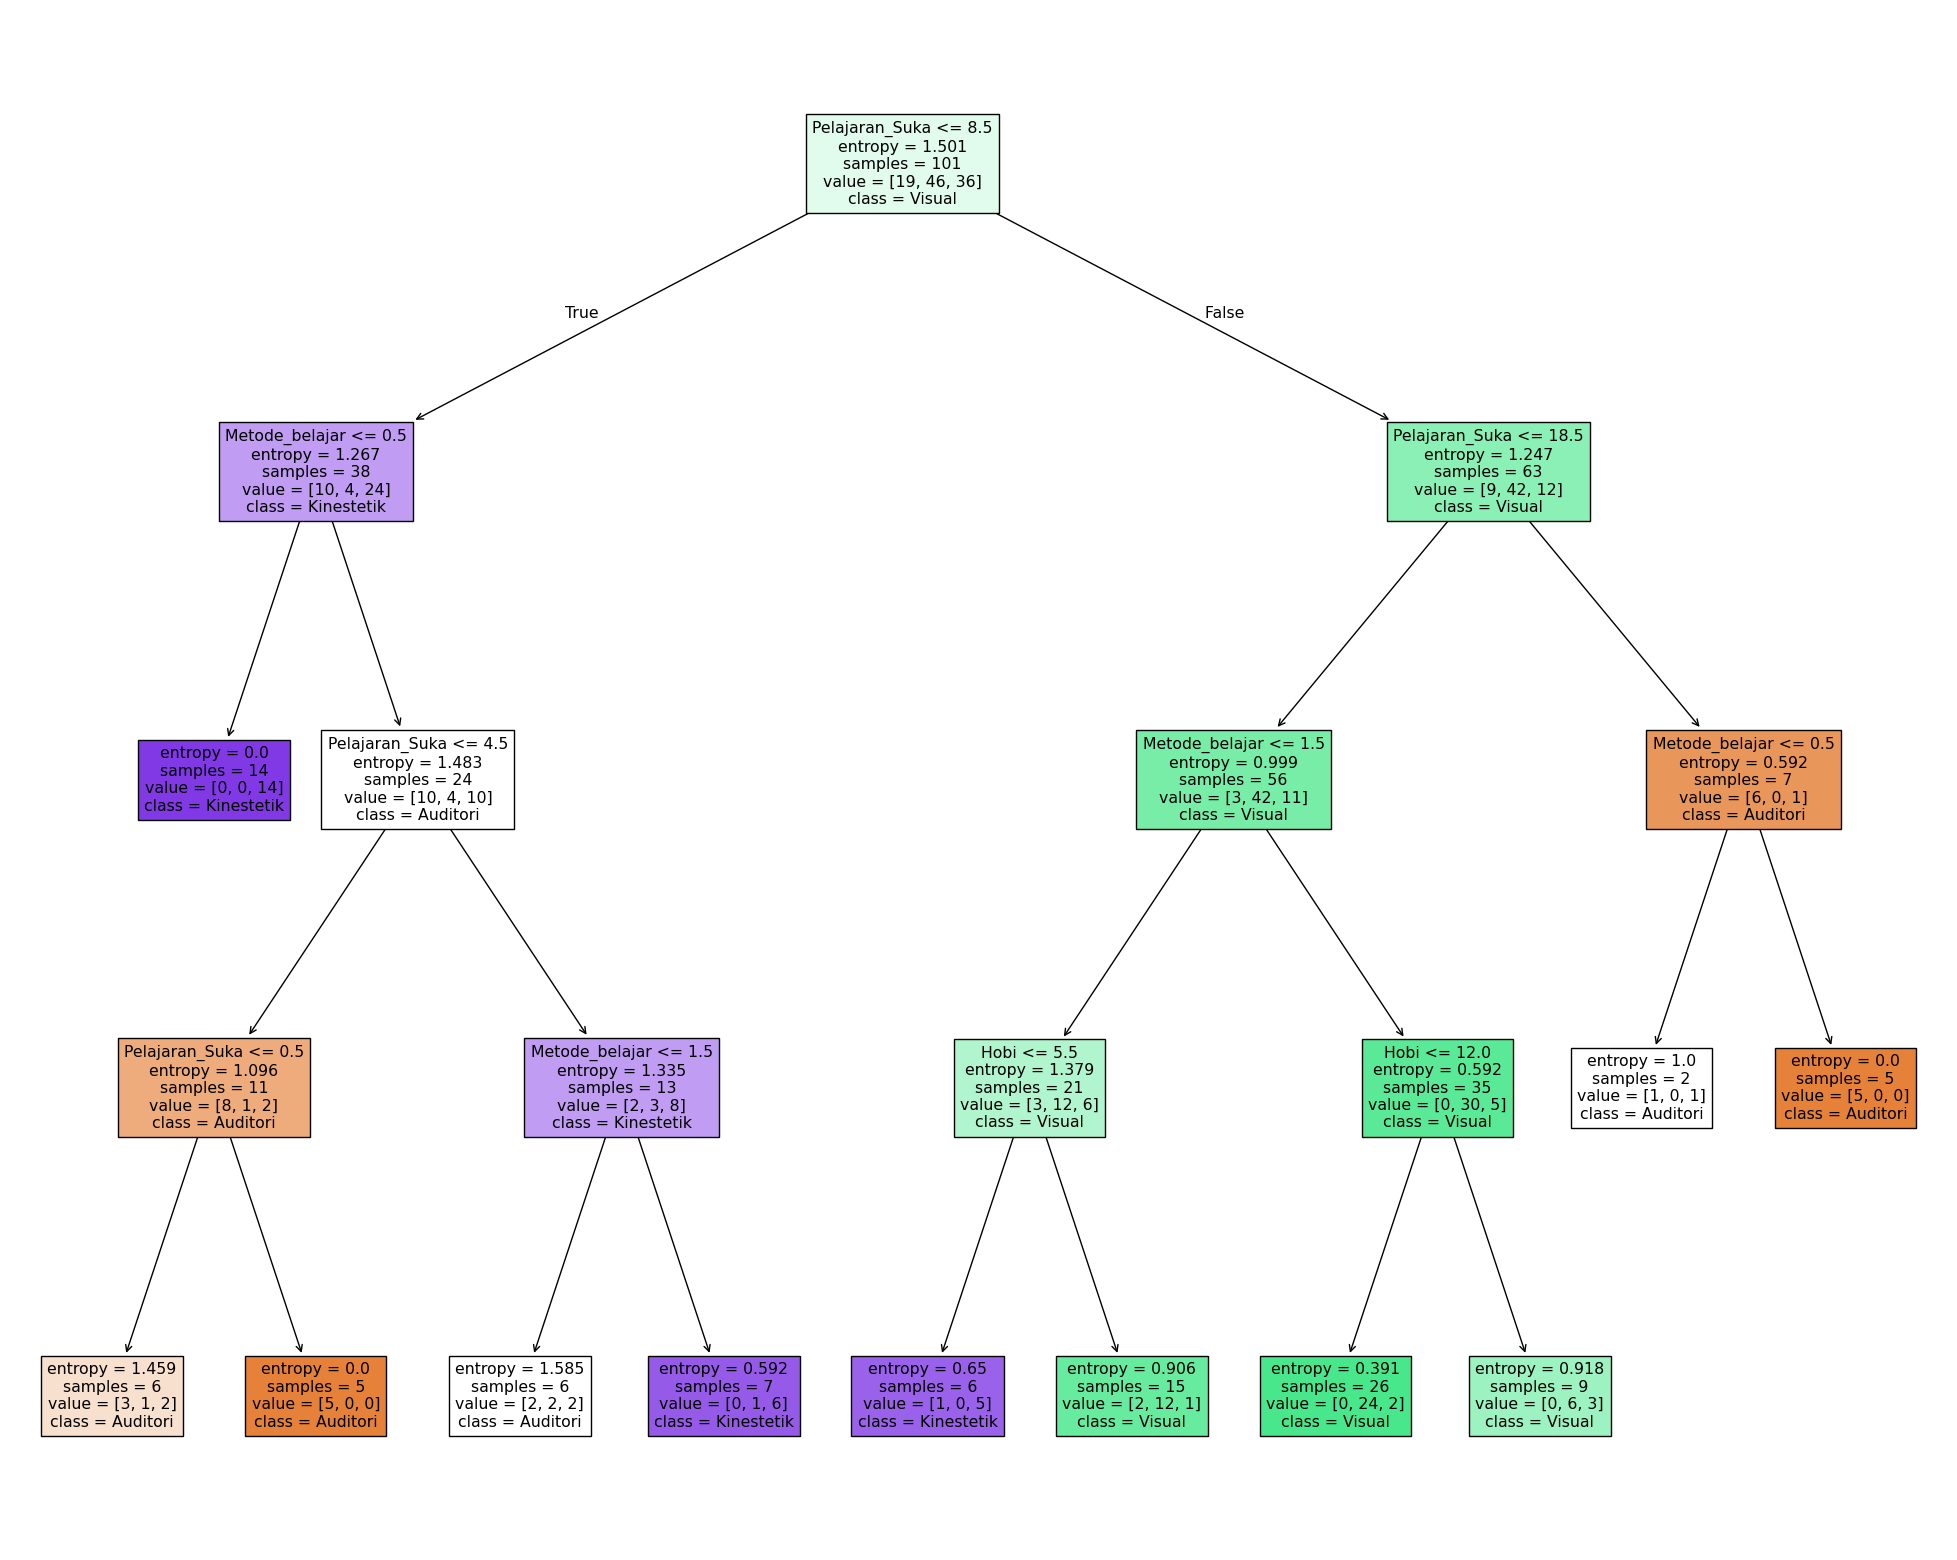

In [30]:
# ...existing code...
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    model,
    feature_names=ind_col,
    class_names=['Auditori', 'Visual', 'Kinestetik'],
    filled=True
)
# ...existing code...